In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
diabetes=datasets.load_diabetes()

In [10]:
print("Keys of diabetes_dataset: \n{}".format(diabetes.keys()))
print(diabetes['DESCR'][:100])
print(diabetes['data'][:5])
print(diabetes['target'][:5])
print(diabetes['feature_names'])

Keys of diabetes_dataset: 
dict_keys(['data', 'target', 'DESCR', 'feature_names'])
Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, a
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[ 151.   75.  141.  206.  135.]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [11]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [71]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [72]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [73]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


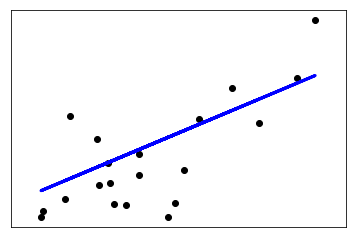

In [74]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [75]:
regr.score(diabetes_X_test,diabetes_y_test)

0.47257544798227119

In [76]:
reg=Ridge(alpha=0.3, normalize=True).fit(x_train_scaled,diabetes_y_train)
reg.coef_
reg.intercept_ 

87.867637731555831

In [77]:
diabetes_y_pred_reg = reg.predict(diabetes_X_test)

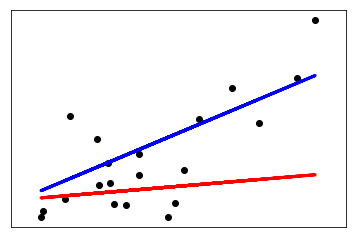

In [78]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred_reg, color='red', linewidth=3)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [79]:
reg.score(diabetes_X_test,diabetes_y_test)

-0.16564778016286064

In [80]:
las = Lasso (alpha=0.3, normalize=True)
las.fit (diabetes_X_train, diabetes_y_train) 

las.coef_

las.intercept_ 

152.98010399209033

In [81]:
diabetes_y_pred_las = las.predict(diabetes_X_test)

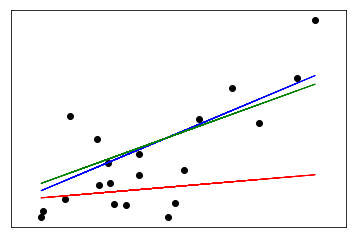

In [82]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred_reg, color='red', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_pred_las, color='green', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In [83]:
las.score(diabetes_X_test,diabetes_y_test)

0.43441105306717764

## Conclusion:
Ridge regression performed the worst, Linear was the best. We can see this from the plots and R-squared value.